In theory, both XLNet and BERT have the capability to process sequences consisting of up to 512 tokens, however the following examination
of the subword distribution within the sentences reveals
that the majority of sentences contain less than 250 subwords. Consequently,
it is possible to truncate all comments to a maximum of 250
subwords, reducing training time and accommodating the constraints of limited GPU memory.

In [ ]:
!pip install transformers

import os
import math

import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, BertTokenizer
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/My Drive/DATASETS/wiki_toxic/train.csv')
validation_df = pd.read_csv('/content/drive/My Drive/DATASETS/wiki_toxic/validation.csv')
frac = 0.5
#TRAIN
print(train_df.shape[0]) # get the number of rows in the dataframe
rows_to_delete = train_df.sample(frac=frac, random_state=1) # randomly select half of the rows. Random_state ensures reproducibility
train_df = train_df.drop(rows_to_delete.index)
print(train_df.shape[0])

#VALIDATION
print(validation_df.shape[0]) # get the number of rows in the dataframe
rows_to_delete = validation_df.sample(frac=frac, random_state=1) # randomly select half of the rows. Random_state ensures reproducibility
validation_df = validation_df.drop(rows_to_delete.index)
print(validation_df.shape[0])

train_text = train_df.comment_text.values
validation_text = validation_df.comment_text.values
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_texts_train = list(map(lambda t: tokenizer.tokenize(t), train_text))
tokenized_texts_len_train = list(map(lambda t: len(t), tokenized_texts_train))

tokenized_texts_validation = list(map(lambda t: tokenizer.tokenize(t), validation_text))
tokenized_texts_len_validation = list(map(lambda t: len(t), tokenized_texts_validation))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
127656
63828
31915
15957


Text(0.5, 1.0, 'Subword distribution (Train dataset)')

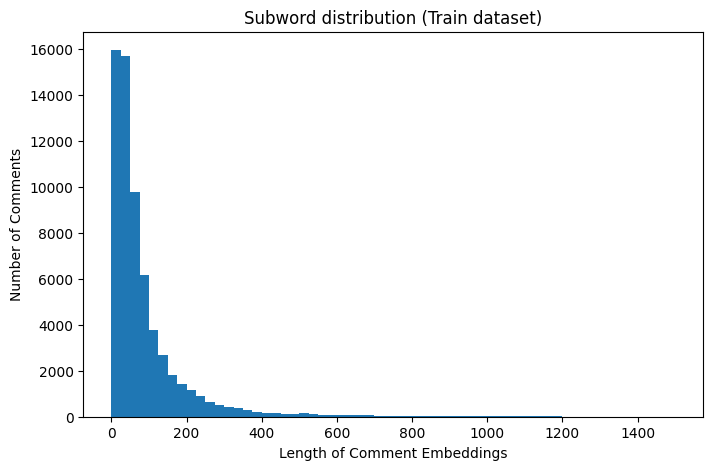

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5));
ax.hist(tokenized_texts_len_train, bins=60,range=[0,1500]);
ax.set_xlabel("Length of Comment Embeddings");
ax.set_ylabel("Number of Comments");
ax.set_title("Subword distribution (Train dataset)")

Text(0.5, 1.0, 'Subword distribution (Validation dataset)')

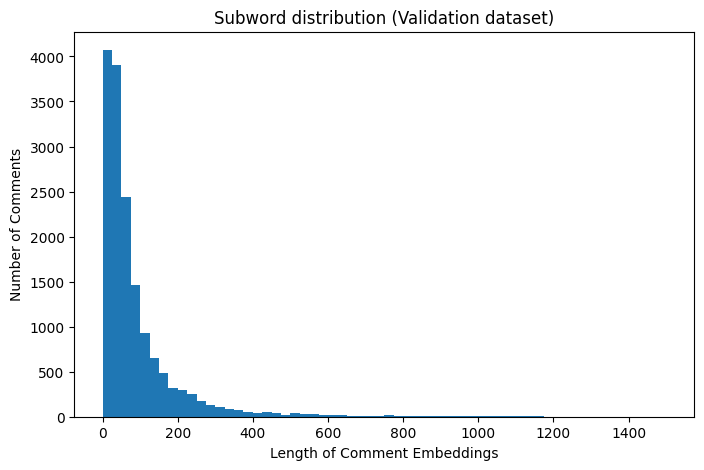

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5));
ax.hist(tokenized_texts_len_validation, bins=60,range=[0,1500]);
ax.set_xlabel("Length of Comment Embeddings");
ax.set_ylabel("Number of Comments");
ax.set_title("Subword distribution (Validation dataset)")